# Python pour le Machine Learning : SciPy


## 1. Intro

Nous allons voir comment faire du calcul scientifique avec $SciPy$. À l'intérieur de ce package, on retrouve des outils absolument incroyables pour faire du mathématique, et bizarrement, beaucoup de datascientists oublient de les utiliser.

En l'occurrence, on va voir comment :

- Faire des interpolations
- S'attaquer à l'optimisation de problème
- Procéder au traitement du signal, ce qui inclura la Transformée de Fourier, extrêmement puissante pour filtrer des signaux.

Nous terminerons en voyant comment faire du traitement d'image avec $ndimage$. Je téléchargerai même en live une image qui nous vient d'internet pour que nous puissions faire l'analyse avec différentes techniques et en retirer des informations intéressantes dans un tableau $numpy$.

Alors, quand on consulte la documentation officielle de $SciPy$, qui est disponible à cette adresse : https://docs.scipy.org/doc/scipy/reference/index.html, on peut se rendre compte que dans scipy, on a tout un tas de petits modules qui nous permettent de réaliser des actions scientifiques bien précises. 

Par exemple, on va retrouver un module pour faire de l'algèbre linéaire ou un autre pour faire des statistiques. En fait, c'est un peu comme dans $numpy$ où nous avions aussi $linalg$ et $stats$.

On va s'intéresser tout de suite au module $interpolate$ et $ndimage$.

## 2. Interpolate

Il arrive souvent qu'on ait à disposition des datasets dans lesquels il manque des valeurs. Il peut y avoir plusieurs raisons à cela. Par exemple, on peut avoir deux capteurs qui collectent des données avec des fréquences d'acquisition différentes. Imaginons que le capteur 1 récolte des données chaque seconde, tandis que le capteur 2 le fait une fois toutes les trois secondes. 

![Python_Scipy_000003.png](./images/Python_Scipy_000003.png)

Dans cette situation, on pourrait penser qu'on ne peut utiliser qu'un tiers de nos données car les deux autres tiers présentent des problèmes de correspondance entre nos deux signaux. Cependant, ces valeurs ne sont pas perdues si nous pouvons les interpoler.

Pour vous illustrer cela, imaginez que le deuxième capteur nous donne des points spécifiques. Ce que nous souhaiterions, c'est interpoler, c'est-à-dire placer davantage de points entre nos points donnés. Pour cela, nous allons utiliser la fonction $interp1d$ du module $interpolate$. Cette fonction génère une autre fonction, disons $f$, qui va servir pour l'interpolation. 

![Python_Scipy_000003.png](./images/Python_Scipy_000004.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

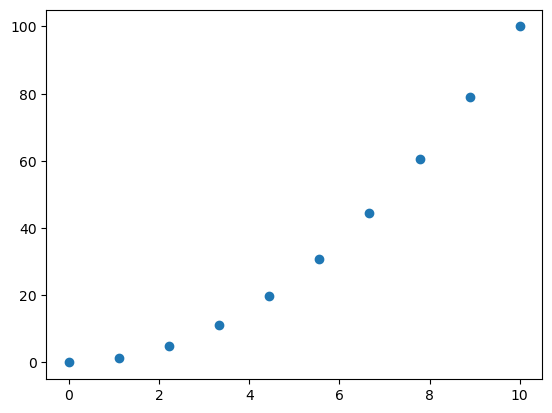

In [2]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

Ainsi, on peut écrire : $\text{f = interp1d(x, y, type_interpolation)}$ où $x$ et $y$ sont nos données et $type\_interpolation$ le type d'interpolation souhaité. L'interpolation linéaire est le type le plus basique qui trace simplement une ligne entre deux points.

In [3]:
from scipy.interpolate import interp1d

In [4]:
# création de la fonction interpolation f
f = interp1d(x, y, kind='linear')

Avec cette fonction $f$, nous pouvons l'utiliser comme bon nous semble. Par exemple, nous pouvons définir un nouvel axe $x$ avec 30 points :

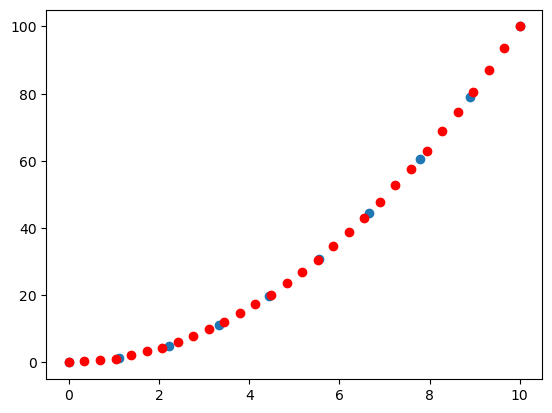

In [5]:
# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 30)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

Avec quelques lignes de $matplotlib$, nous pouvons afficher notre dataset avec les points interpolés.

Cependant, lorsqu'on interpole, il faut faire attention à ne pas masquer la réalité. Par exemple, entre nos points donnés, il pourrait y avoir des oscillations que nous n'aurions pas observées car la fréquence d'acquisition de notre capteur 2 était trop faible. En procédant à une interpolation simpliste, nous pourrions manquer ces oscillations, ce qui fausserait notre dataset.

![Python_Scipy_000003.png](./images/Python_Scipy_000005.png)

Il existe de nombreux types d'interpolation, comme linéaire, quadratique, cubique, etc. **Il est essentiel de comprendre leur signification mathématique pour être un meilleur data scientist.** Ces types d'interpolation sont bien documentés dans les références de SciPy.

Si par exemple, nous avons ce dataset:

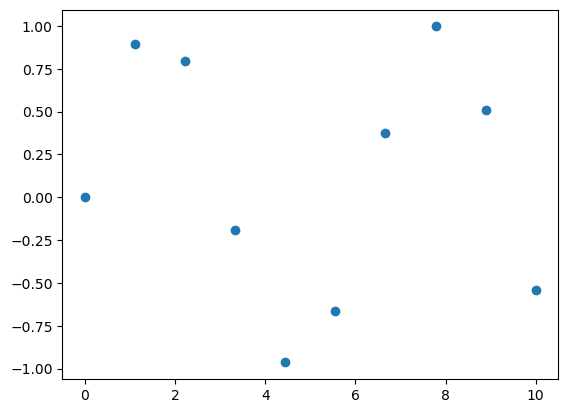

In [6]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

Et que l'on exécute le code avec une interpolation linéaire :

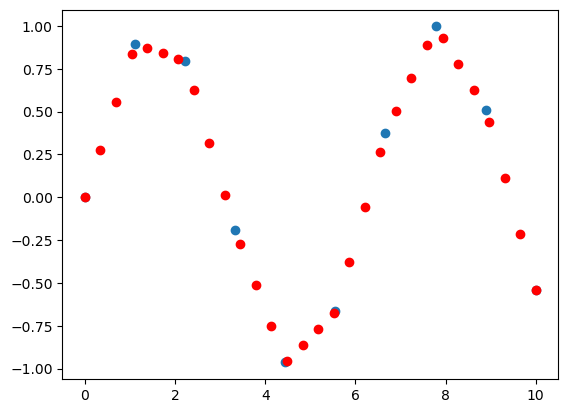

In [7]:
# création de la fonction interpolation f
f = interp1d(x, y, kind='linear')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 30)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

Nous voyons que ce ne pas terrible, donc dans ce cas on préfère un type d'interpolation cubique.

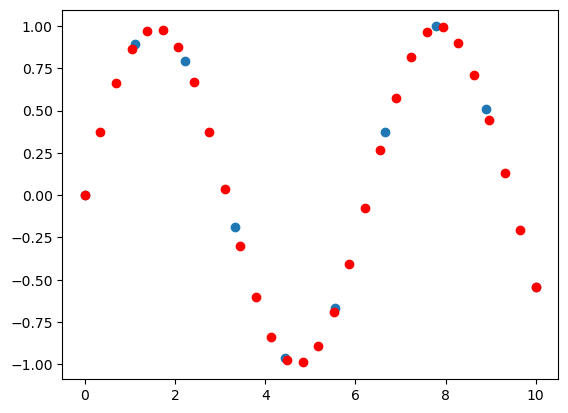

In [8]:
# création de la fonction interpolation f
f = interp1d(x, y, kind='cubic')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 30)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

En conclusion sur le module interpolate, sachez qu'il existe une fonction similaire en 2D qui fonctionne de la même manière.

## 3. Optimize

### 3.1 Optimize.curve_fit

Quand on parle d'optimisation, on fait le plus souvent référence à des problèmes de minimisation. À l'intérieur du module $optimize$, on va retrouver une fonction $minimize$ qui contient de nombreux algorithmes de minimisation. 

On trouve également des fonctions qui nous permettent d'optimiser le placement d'une courbe à l'intérieur d'un nuage de points, notamment la fonction $curve_fit$. Il y a également des outils pour réaliser de la programmation linéaire qui permettent de résoudre un problème d'optimisation tout en respectant certaines contraintes. 

Imaginons que nous ayons un dataset représentant un polynôme de degré 3 auquel j'ai ajouté un peu de bruit. 

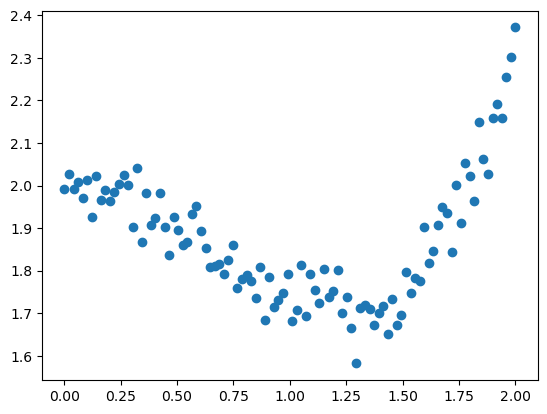

In [9]:
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

Notre objectif serait de développer un modèle statistique qui s'adapte parfaitement à notre nuage de points. 

Pour cela, on pourrait utiliser la fonction $curve\_fit$, qui utilise la méthode des moindres carrés pour déterminer les meilleurs paramètres (a, b, c, etc.) d'un modèle fourni.
![Python_Scipy_000003.png](./images/Python_Scipy_000010.png)

Pour utiliser cette fonction, il faut d'abord définir un modèle.
![Python_Scipy_000003.png](./images/Python_Scipy_000011.png)

Créons un modèle $f$ en fonction de $x$ et des paramètres $a$,$b$,$c$ et $d$. 

In [10]:
# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [11]:
from scipy import optimize

Après avoir importé le module $optimize$, nous utiliserons $curve\_fit$ en lui fournissant notre modèle $f$ et les données de notre dataset, soit $x$ et $y$.

L'exécution nous renverra deux tableaux : le premier contient les paramètres de notre modèle (a, b, c, d), et le second représente la matrice de covariance entre ces paramètres.

In [12]:
optimize.curve_fit(f, x, y)

(array([ 0.40995776, -0.80842475,  0.14236653,  1.98567584]),
 array([[ 0.0009719 , -0.00291571,  0.00232086, -0.00037706],
        [-0.00291571,  0.00900188, -0.00747212,  0.0012993 ],
        [ 0.00232086, -0.00747212,  0.00663047, -0.00130594],
        [-0.00037706,  0.0012993 , -0.00130594,  0.00035009]]))

Pour cet exercice, nous ne nous concentrerons pas sur la matrice de covariance. Enregistrons ces deux tableaux dans des variables nommées $params$ et $param\_cov$.

In [13]:
# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

En utilisant $matplotlib$, nous pouvons visualiser notre modèle en fonction de $x$. Le résultat montre que notre modèle s'adapte parfaitement au nuage de points, ce qui est excellent.

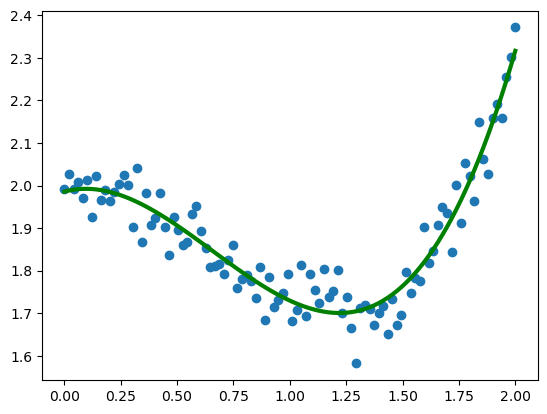

In [14]:
# Visualisation des résultats.
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

Maintenant, si vous connaissez déjà $Scikit-learn$, vous pourriez penser que ce que nous venons de faire peut être réalisé avec cette bibliothèque. 

En effet, je recommanderais d'utiliser $Scikit-learn$ pour ce type de tâches car elle est plus performante. Ici, je vous ai montré cette méthode à titre informatif et éducatif.

### 3.1 Optimize.minimize

On va maintenant parler de la fonction $minimize$ qui nous permet de minimiser n'importe quelle fonction mathématique. Donc, j'ai ici créé une nouvelle fonction $f$ qui nous donne la courbe suivante. Sur cette courbe, on trouve plusieurs minimums. Il sera donc assez intéressant de voir ce que $minimize$ nous retourne comme minimum.

In [15]:
# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)

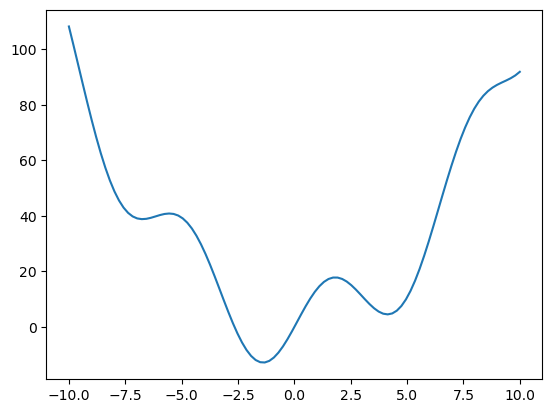

In [16]:
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

Pour utiliser cette fonction, c'est très simple. On va la chercher dans le module $optimize$ et ensuite, tout ce qu'on a à faire, c'est de faire passer notre fonction $f$ ainsi qu'un point de départ, $x0$. Par exemple, le point $x0 = -8$. À partir de ce point $x0$, la fonction $minimize$ va exécuter un algorithme de minimisation qui va peu à peu converger vers le premier minimum qu'elle rencontre. 

Ces algorithmes sont décrits dans la documentation et s'inspirent généralement de la méthode de Newton ou de la descente de gradient.

In [17]:
optimize.minimize(f, x0=-8)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.81120617595851
        x: [-6.738e+00]
      nit: 6
      jac: [ 4.768e-07]
 hess_inv: [[ 1.164e-01]]
     nfev: 14
     njev: 7

En exécutant notre code, on va obtenir un message assez long où on nous indique que l'optimisation a été un succès. On obtient aussi des valeurs, mais ce qui nous intéresse vraiment, c'est la coordonnée pour laquelle on a trouvé notre minimum. 

On nous indique que le minimum se trouve à $x = -6.7$, qui est ici. Mais cela représente un minimum local. Moi, je suis intéressé par le minimum global, celui qui se situe au plus bas. 

Pour le trouver, on pourrait choisir un autre algorithme, mais parfois, une meilleure solution est de choisir un autre point de départ. Si on choisit $x0 = -5$, cette fois-ci, on obtient $x = -1.38$, qui semble être notre minimum global. Mission accomplie!

Si on souhaite enregistrer ce résultat, on va écrire $.x$ à la fin pour y accéder, et on peut enregistrer cela dans une variable, result. 

In [18]:
# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = optimize.minimize(f, x0=x0).x # résultat de la minimisation

Après quelques lignes avec matplotlib, on peut afficher tout sur un graphique. J'ai utilisé la fonction $scatter$ pour montrer les résultats.

    1. Tracer la courbe de f(x) contre x avec une épaisseur de ligne de 3.
    
    2. Afficher un point pour le result en rouge.
    
    3. Afficher un autre point pour x0​ (que vous avez désigné par xθ​ ici) en vert avec un marqueur "+".

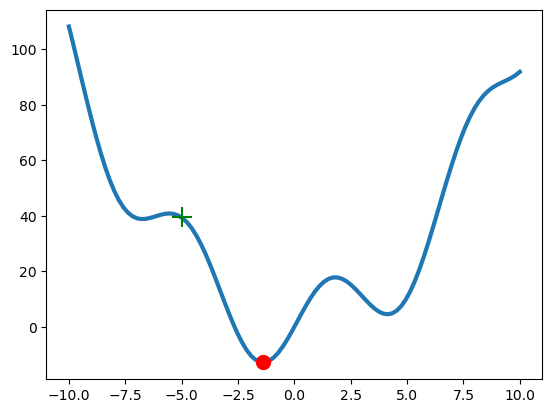

In [19]:
# Tracer la courbe
plt.plot(x, f(x), lw=3, zorder=-1)

# Afficher le résultat en rouge
plt.scatter(result, f(result), s=100, c='r', zorder=1)

# Afficher le point de départ x0 (x_theta ici) en vert avec un marqueur "+"
x_theta = x0
plt.scatter(x_theta, f(x_theta), s=200, marker='+', c='g', zorder=1)

# Afficher le graphique
plt.show()

Ce qui est génial avec minimize, c'est qu'on peut aussi l'utiliser avec des fonctions à deux ou trois dimensions. 

En fait, on peut l'utiliser avec des fonctions de n'importe quelles dimensions. C'est très puissant! 

Par exemple, dans la leçon sur matplotlib, on avait créé une fonction qu'on avait visualisée avec un $contour\ plot$. 

In [20]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

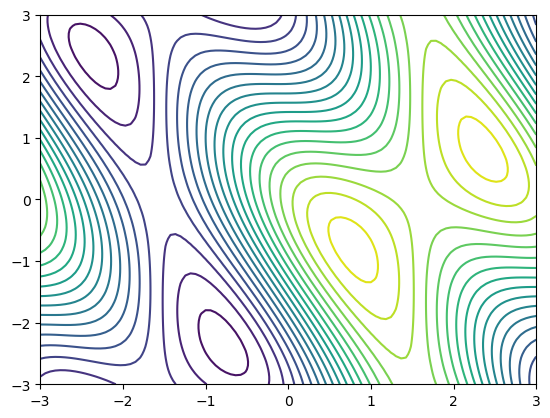

In [21]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3,100)

x, y = np.meshgrid(x,y)
plt.contour(x, y, f(np.array([x,y])),20)

Sur ce graphique, on voit clairement un maximum et deux minimums. Pour utiliser minimize, on procède comme avant, sans aucune difficulté supplémentaire. 

Toutefois, puisque nous travaillons en deux dimensions, on doit initialiser la fonction avec deux points. Disons $x0$ aux coordonnées (0,0). Maintenant, on passe ce point dans notre fonction minimize et voilà, tout est fait!

le minimum est aux coordonées [-0.78539918 -2.3561934 ]


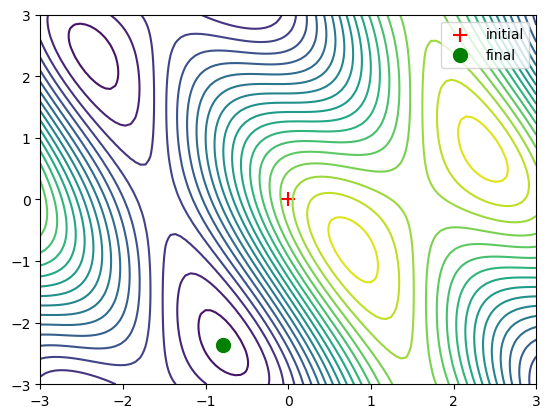

In [22]:
x0 = np.zeros(2)

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()

En résumé, c'est ainsi qu'on réalise des minimisations avec le module optimize.

## 4. Traitement du signal

Dans $matplotlib$, on a plusieurs modules à disposition pour faire du traitement du signal. 

Tout d'abord, on a bien sûr le module $signal\ processing$ dans lequel on va trouver énormément de fonctions pour faire des convolutions, des filtres, et vraiment beaucoup d'autres choses. 

Mais on va aussi découvrir un autre module très intéressant et puissant. C'est un module qui permet de faire des transformations de Fourier.

### 4.1 Signal.DTREND

Nous allons le module signal processing. Je vais, en l'occurrence, vous montrer une fonction très simple, la fonction $dtrend$. Cette fonction nous permet d'éliminer toute tendance linéaire qu'on aurait dans un signal, comme par exemple le signal qu'on a ici. 

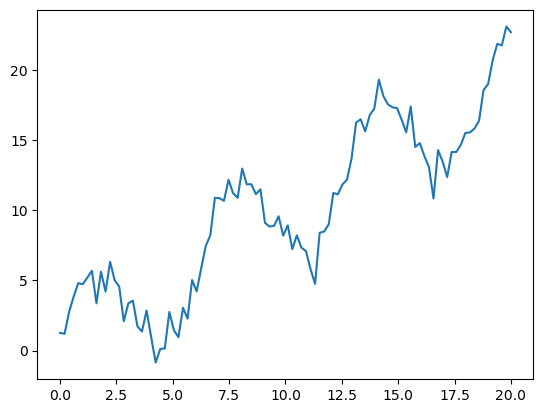

In [23]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

Si on veut éliminer cette tendance, on va d'abord importer le module $signal$. 

Une fois que c'est fait, on peut utiliser la fonction $detrend$ qui se trouve dans ce module. 

In [24]:
from scipy import signal

Tout ce qu'on a à faire c'est de passer notre signal dans cette fonction, et on va l'enregistrer dans une nouvelle variable. 

In [25]:
# Élimination de la tendance linéaire
new_y = signal.detrend(y)

Si on affiche les deux avec matplotlib, on obtient notre signal originel ainsi que le signal dans lequel on a éliminé la tendance.

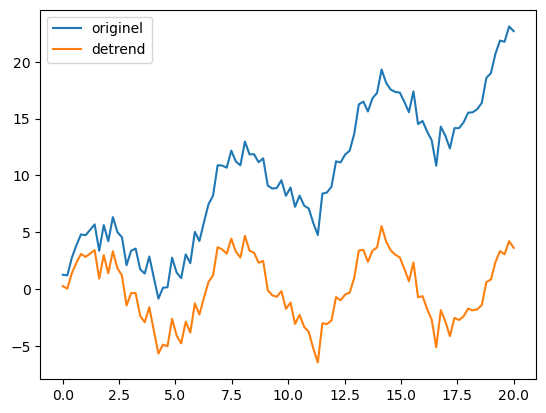

In [26]:
# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()



### 4.1 Tranformation de Fourier

La transformation de Fourier, c'est en fait une technique mathématique qui permet d'extraire et d'analyser les fréquences présentes dans un signal périodique. 
![image.png](./images/Python_Scipy_Fig_000012.png)

Par exemple, sur le graphique qui est tout à gauche, vous avez trois signaux périodiques avec chacun sa propre fréquence. 

Ces trois signaux, si on les combine ensemble, vont donner le signal qu'on voit au milieu. Et c'est ce genre de signaux qu'on retrouve tout autour de nous, dans le son, dans les ondes qui nous entourent. 

C'est souvent des combinaisons de différentes fréquences.

![image.png](./images/Python_Scipy_Fig_000013.png)

La transformation de Fourier permet de prendre un signal comme celui-ci et d'en extraire les différentes fréquences qui le composent. 

Le résultat est un graphique qu'on appelle un "spectre", où en abscisse on observe les fréquences et en ordonnée, on observe l'amplitude pour chaque fréquence. Sur ce spectre, on peut voir trois pics qui représentent chacune des fréquences qu'on avait sur le signal à gauche. 

Si on veut générer un tel spectre avec $SciPy$, on va charger le module $fftpack$ et utiliser deux fonctions de ce module, à savoir $fft$ et $fft\_freq$.
![image.png](./images/Python_Scipy_Fig_000015.png)

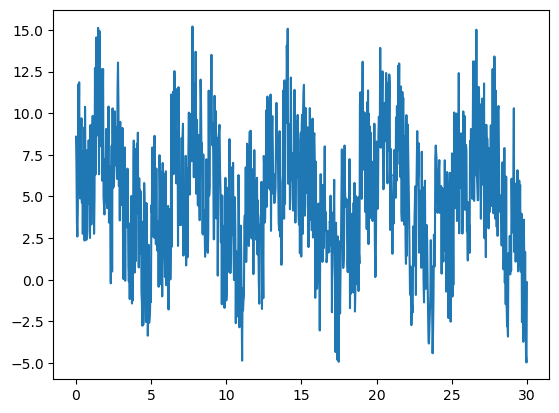

In [27]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

On va d'abord importer le module $fft$.

In [28]:
from scipy import fftpack

Puis on va créer une variable qui prendra la transformation de Fourier de notre signal. 

In [29]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)

On créera aussi une variable pour les fréquences.

In [30]:
frequences = fftpack.fftfreq(y.size)

À ce stade, on peut tracer notre spectre.

C:\Users\romeofr\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


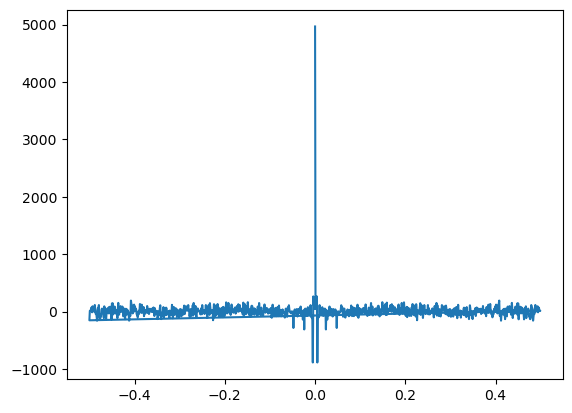

In [31]:
plt.plot(frequences, fourier)

Mais il ne ressemblera pas vraiment à ce quui est attendu, pas de panique, c'est normal. En utilisant ces fonctions, on obtient aussi des fréquences et amplitudes négatives. Pour filtrer tout ça, on va prendre la valeur absolue de notre signal de Fourier et de nos fréquences. 

In [32]:
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives

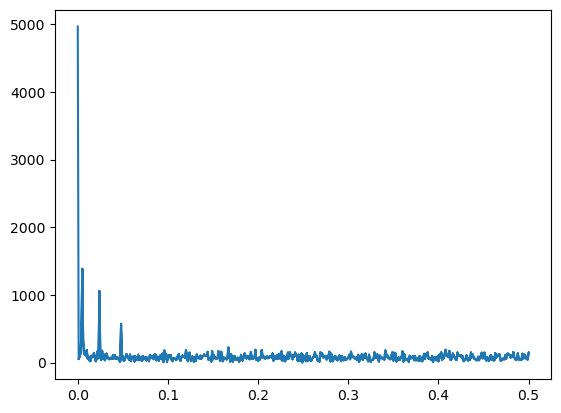

In [33]:
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

Maintenant, nous obtenons le spectre que nous sommes censés avoir.

Sur ce spectre, on peut voir trois pics qui correspondent à nos trois fréquences. 

Vous pourriez vous demander : "Ok, c'est cool, mais à quoi ça sert ?" Eh bien, les applications de la transformation de Fourier sont infinies. Par exemple, on peut l'utiliser pour filtrer un signal. 

Imaginez qu'on ait un signal, comme celui en haut à gauche, perdu dans du bruit. On peut filtrer ce signal pour obtenir le résultat en bas à droite en seulement trois étapes simples. 
![image.png](./images/Python_Scipy_Fig_000016.png)

Ces étapes consistent 
1. à faire la transformation de Fourier, 
2. à filtrer les valeurs dans le spectre, en utilisant du Boolean Indexing, pour éliminer toutes les valeurs inférieurs à un certains seuil,
3. puis utiliser le spectre pour lui appliquer la transformation de Fourier inverse pour obtenir un signal propre.

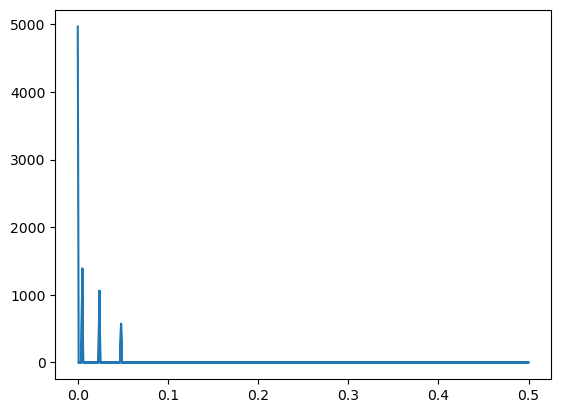

In [34]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

On voit très clairement que le scpectre est nettoyé, il n'y a plus de bruit dedans.

Très clairement, notre spectre est nettoyé; il n'y a plus de bruit dedans. Maintenant, la dernière étape consiste à prendre ce spectre et à y appliquer la transformation de Fourier inverse. Pour cela, à l'intérieur du module $fft$, on trouve une fonction nommée $ifft$ qui signifie "transformation de Fourier inverse". Avec cette fonction, on va simplement faire passer notre spectre de Fourier, et le résultat sera stocké dans une variable appelée $filtered\_signals$.

In [35]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

Après avoir exécuté cette opération, avec un peu de visualisation nous avons notre signal filtré, représenté en orange, superposé sur notre signal original qui était rempli de bruit.

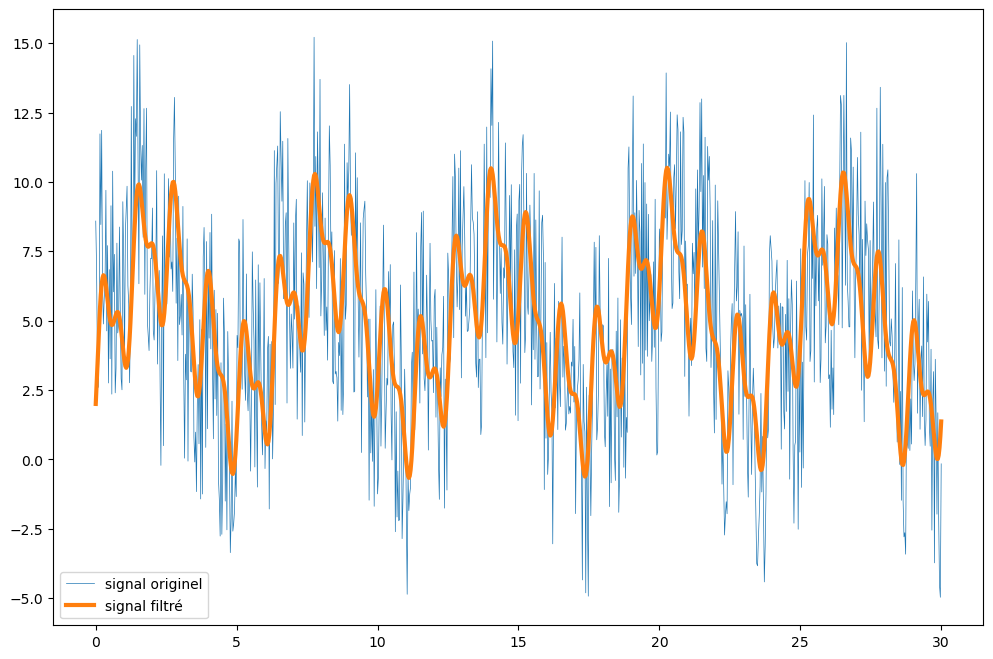

In [36]:
# Visualisation des résultats
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

Cet exemple illustre à quel point cette technique peut être extrêmement puissante en matière de traitement du signal.

## 5. Image processing

Avec $syfy$, on dispose du module $ndimage$ qui nous propose une panoplie de fonctions. Parmi elles :

<ol>
 <li>Des fonctions pour réaliser des convolutions.</li>
 <li>Des fonctions pour appliquer des filtres de Fourier, ce qui est assez semblable à ce que nous avons vu précédemment.</li>
 <li>Des fonctions dédiées aux interpolations.</li>
 <li>Des fonctions pour effectuer des mesures sur des images, ce qui peut s'avérer très utile.</li>
 <li>Et des fonctions pour la morphologie</li>
</ol>

La morphologie, c'est une technique mathématique qui permet de transformer des matrices, et donc, par extension, des images. Le principe est très simple : on définit une structure, souvent sous forme de croix. 
![image.png](./images/Python_Scipy_Fig_000017.png)

Cette structure se déplace pixel par pixel sur l'image. 
![image.png](./images/Python_Scipy_Fig_000018.png)
![image.png](./images/Python_Scipy_Fig_000019.png)

Lorsqu'elle rencontre un pixel blanc, elle va effectuer une opération : soit imprimer autour d'elle des pixels blancs selon son motif (ce qu'on appelle la dilation), soit effacer les pixels autour (ce qu'on appelle l'érosion).
![image.png](./images/Python_Scipy_Fig_000020.png)

Prenons l'exemple de la dilation : Lorsque nous appliquons la dilation à cette image, la structure commence avec le pixel en haut à gauche. 
![image.png](./images/Python_Scipy_Fig_000021.png)

Même si ce pixel ne lui apprend rien, elle continue son parcours jusqu'à rencontrer le premier pixel blanc. 
![image.png](./images/Python_Scipy_Fig_000022.png)
![image.png](./images/Python_Scipy_Fig_000023.png)

Mais lorsqu'elle rencontre un pixel blanc, elle va imprimer quatre pixels blancs autour d'elle selon son motif. 
![image.png](./images/Python_Scipy_Fig_000024.png)

Elle répète ce processus pour chaque pixel blanc rencontré.
![image.png](./images/Python_Scipy_Fig_000025.png)
![image.png](./images/Python_Scipy_Fig_000026.png)

Ce processus se poursuit, et on finit par obtenir un résultat final.
![image.png](./images/Python_Scipy_Fig_000027.png)

À l'inverse, le processus d'érosion efface les pixels environnants lorsqu'il rencontre un pixel blanc. Par exemple, si des pixels blancs sont détectés, tout ce qui les entoure est effacé. Ce processus continue jusqu'à ce qu'on obtienne le résultat final.
![image.png](./images/Python_Scipy_Fig_000028.png)
![image.png](./images/Python_Scipy_Fig_000029.png)
![image.png](./images/Python_Scipy_Fig_000030.png)
![image.png](./images/Python_Scipy_Fig_000031.png)
![image.png](./images/Python_Scipy_Fig_000032.png)
![image.png](./images/Python_Scipy_Fig_000033.png)
![image.png](./images/Python_Scipy_Fig_000034.png)

Ces deux techniques de morphologie peuvent être utilisées pour, par exemple, supprimer les petits artéfacts présents sur une image. 

Pour illustrer cela, j'ai importé une $ndimage$ et créé une autre image, $X$, sur laquelle j'ai ajouté des artéfacts. 

In [37]:
from scipy import ndimage

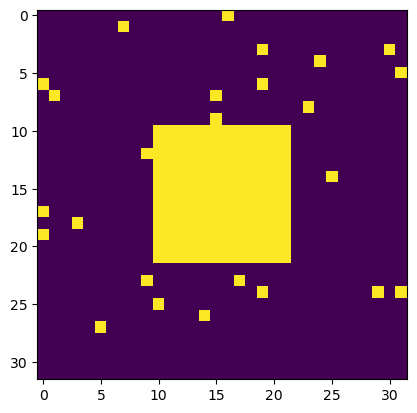

In [38]:
# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

Une solution pour enlever ces artefacts serait d'utiliser la fonction $binary\_opening$ de $ndimages$, qui est en réalité une combinaison d'érosion et de dilation.

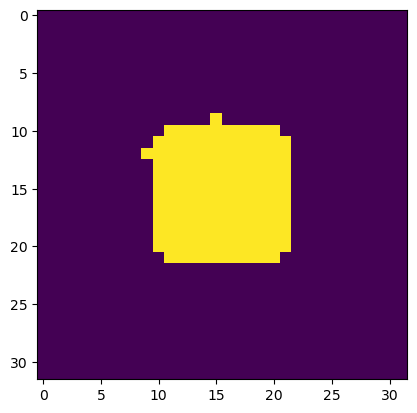

In [39]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

Après avoir appliqué cette fonction à $X$, si nous observons le résultat, on remarque que les artefacts ont bien été supprimés. 

Cependant, nous avons également perdu certaines informations de notre image, notamment aux coins. Comme on dit, chaque action a un coût, et ici, le prix à payer est la dégradation d'une partie de la structure de l'image qui pourrait être importante pour nous.

## 6. Application

 Nous sommes actuellement sur Google Images, et nous allons essayer de trouver une photo de bactéries ou de cellules. Nous allons télécharger une photo et ensuite, nous tenterons de réaliser trois choses :

<ol>
<li>Extraire les bactéries de l'arrière-plan de la photo.</li>
<li>Utiliser les techniques de morphologie pour enlever quelques artefacts potentiellement présents sur cette photo.</li>
<li>Une fois la photo bien nettoyée, nous utiliserons une fonction dans $ndimages$ pour mesurer la taille de chaque bactérie présente sur cette photo.</li>
</ol>

Enfin, nous présenterons tous ces résultats sous forme de graphique.

Maintenant que la photo est téléchargée, nous allons l'importer dans jupyter. 

L'image est en trois dimensions, ce qui n'est pas idéal pour la manipulation d'images. Nous allons donc la réduire à deux dimensions en faisant un $subsetting$ : on sélectionne les deux premières dimensions et, pour la troisième, on écrit juste "0". 

(334, 363)

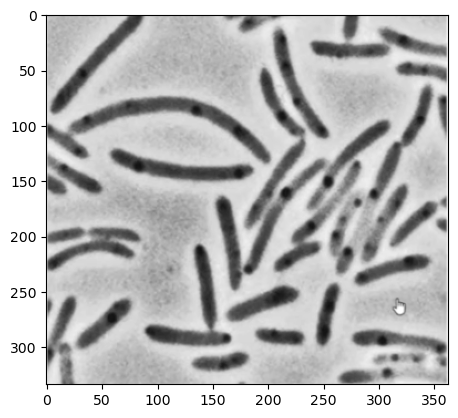

In [40]:
# importer l'image avec pyplot
image = plt.imread('images/bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

La première étape est d'extraire les bactéries de l'arrière-plan. Je pense qu'utiliser du $boolean\ indexing$ avec $numpy$ devrait faire l'affaire. 

Je vais donc créer une copie de mon image. Cette copie, je vais la transformer avec la fonction $ravel$ pour en faire un histogramme. 

Avec $plt$, je vais afficher cette image. 

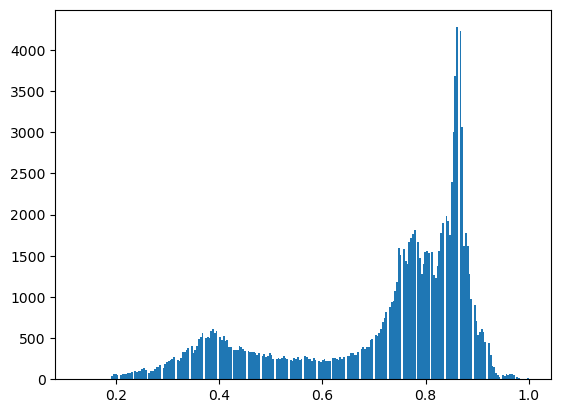

In [41]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

En général, les pixels d'une image peuvent prendre 255 valeurs (dans le cas d'une image 8 bits). 

Notre histogramme montre trois nuances ou groupes distincts. Ces groupes correspondent 
<ol>
    <li>aux bactéries noires,</li> 
    <li>à l'arrière-plan gris clair, et</li> 
    <li>aux pixels les plus blancs.</li>
</ol>

Pour extraire les bactéries, nous allons filtrer tous les pixels ayant une intensité inférieure à une certaine valeur, par exemple 0.5.

In [50]:
image  = image < 0.5
image

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

À ce stade-là, on a donc un masque, car la réponse à cette question sera soit vrai, soit faux. Mais ce masque, d'une certaine manière, peut être utilisé comme une image en soi. Il s'agira d'une image binaire. 

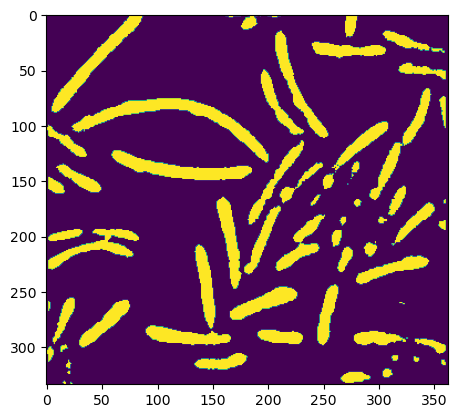

In [51]:
plt.imshow(image)

En l'observant, on pourrait penser que nous avons trop filtré, mais le résultat n'est pas si mal. Peut-être pourrions-nous essayer avec une nouvelle valeur de seuil, disons 0,6.

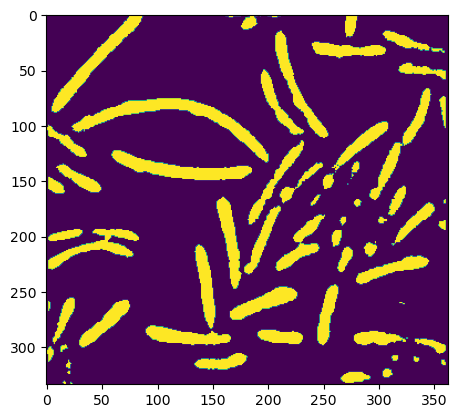

In [55]:
image  = image < 0.6
plt.imshow(image)

Avec cette valeur, la qualité concernant nos bactéries semble meilleure. Cependant, nous observons maintenant quelques artefacts.

Pour se débarrasser de ces artefacts, nous n'allons pas compliquer les choses. Il suffit de copier-coller le code que nous avions utilisé précédemment pour ouvrir l'image, en remplaçant simplement $X$ par notre image. 

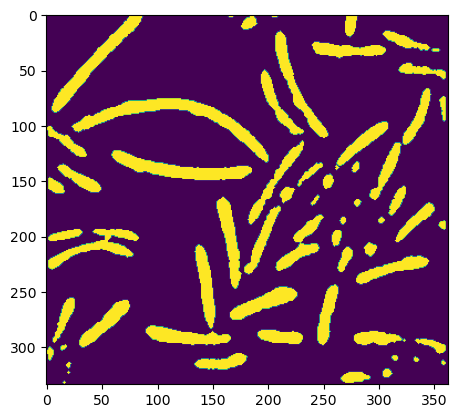

In [56]:
# opération de binary_opening = érosion puis dilation
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

Le résultat montre que certains artefacts ont disparu, bien qu'il en reste encore quelques-uns. Mais l'idée principale est là, et nous allons continuer d'avancer.

Maintenant que nous avons clairement séparé l'arrière-plan des bactéries qui nous intéressent, nous allons utiliser la fonction $label\_image$ pour segmenter cette image et attribuer un label à chaque bactérie visible. 

Cette fonction retourne deux variables : une que nous appellerons "labeled_image" qui sera notre image avec un label pour chaque bactérie, et la seconde est le nombre de labels que nous avons pu placer sur cette image.

In [57]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

il y a 63 groupes


Typiquement, sur cette image, il y a soixante-trois groupes qui ont été créés. 

Si nous voulons visualiser ces groupes, nous utilisons la fonction d'affichage d'image, et nous pouvons voir les différents groupes de bactéries qui ont été identifiés à partir de notre image.

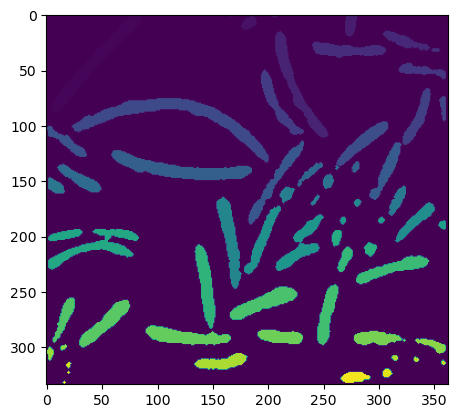

In [58]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)

Pour conclure, nous utiliserons une autre fonction $sum$ qui nous permettra de compter tous les pixels présents dans chaque groupe. 

![image.png](./images/Python_Scipy_Fig_000036.png)

Cela nous permettra de mesurer la taille relative de chaque bactérie sur cette photo. Bien sûr, cette taille n'a pas de signification scientifique précise, mais elle reste intéressante.

In [59]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

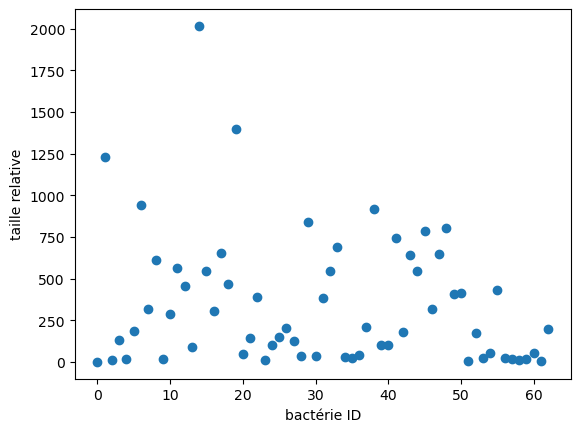

In [60]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()

Avec la librairie matplotlib, nous pouvons afficher toutes ces tailles sur un graphique. Et à partir de ce graphique, nous pourrions commencer à calculer des statistiques comme la moyenne ou l'écart-type.

Réalisez-vous que nous avons réussi à créer ce graphique en seulement 10 minutes à partir d'une photo téléchargée sur internet ? C'est impressionnant ce que l'on peut accomplir avec les outils actuels.